## Polynomial regression
Test on GWL Timeseries in Steenkoppies A2N0612


## 1. import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from numpy import array, hstack, math
from numpy.random import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
np.random.seed(42)
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## 2. Import data 

In [2]:
data=pd.read_excel(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0612\A2N0612.xlsx', parse_dates=['date'],  index_col='date')

In [3]:
data.head(5)

,GWL,River Discharge,Rainfall,Temperature,Groundwater usage
date,,,,,
1989-05-01,-55.14,0.379,3.021605,12.20,13.45
1989-06-01,-55.11,0.386,35.249315,9.45,13.45
1989-07-01,-55.09,0.390,0.000000,9.00,13.45
1989-08-01,-55.08,0.384,0.000000,12.85,13.45
1989-09-01,-55.25,0.361,0.000000,13.85,13.45


In [4]:
data.dtypes

GWL                  float64
River Discharge      float64
Rainfall             float64
Temperature          float64
Groundwater usage    float64
dtype: object

In [5]:
print('The shape of our features is:', data.shape)

The shape of our features is: (342, 5)


## 3. Visualise data 

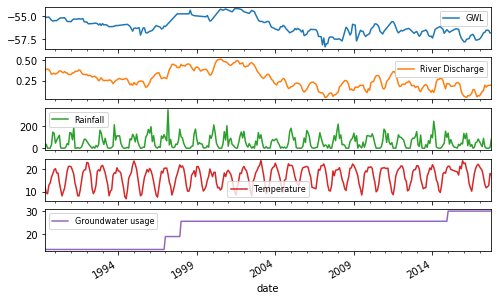

In [6]:
# Plotting
data.plot(kind='line', subplots=True,
     legend=False)

[ax.legend(loc="best", prop={'size': 8}) for ax in plt.gcf().axes]
plt.gcf().set_size_inches(8,5)

##  Split data: Train, test, val split 50%, 10%,10% 

change values here 

In [7]:
#'GWL','Rainfall','Temperature','River Discharge','Groundwater usage'

ytrain5 = data['GWL'].iloc[:171]
Xtrain5 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[:171, :]

ytest5 = data['GWL'].iloc[171:206]
Xtest5  = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[171:206, :]

yval5  = data['GWL'].iloc[206:240]
Xval5 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[206:240, :]

In [8]:
print(ytrain5.shape,Xtrain5.shape,  
      ytest5.shape,Xtest5.shape, 
      yval5.shape,Xval5.shape)

(171,) (171, 4) (35,) (35, 4) (34,) (34, 4)


##  Call model

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

def create_polynomial_regression_model_5(degree):
    #Creates a polynomial regression model for the given degree"    
    poly_features = PolynomialFeatures(degree=degree)
    
    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(Xtrain5)
    
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, ytrain5)
  
   #predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
  
    #predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(Xtest5))
  
    #evaluating the model on training dataset
    rmse_train = metrics.mean_squared_error(ytrain5, y_train_predicted)
    r2_train = metrics.r2_score(ytrain5, y_train_predicted)
  
    #evaluating the model on test dataset
    rmse_test = metrics.mean_squared_error(ytest5, y_test_predict)
    r2_test = metrics.r2_score(ytest5, y_test_predict)
  
    import math
    mse = metrics.mean_squared_error(ytest5, y_test_predict)
    rmse = math.sqrt(mse)
    rmse


        
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("Mean squared error is:",metrics.mean_squared_error(ytrain5,y_train_predicted))
    print("Root mean squared error is:",rmse)
    print("R^2 score is: ",metrics.r2_score(ytrain5, y_train_predicted))
    
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(range(len(ytrain5)), ytrain5, '-b',label='Actual')
    ax.plot(range(len(y_train_predicted)), y_train_predicted, 'r', label='Predicted')
    #plt.plot(x_ax, y_val[:,1], label="y2-val", color='m')
    #plt.plot(x_ax, predictions, label="y2-pred", color='r')
    plt.legend()
    plt.show()
    
    
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("Mean squared error is:",metrics.mean_squared_error(ytest5,y_test_predict))
    print("Root mean squared error is:",rmse)
    print("R^2 score is: ",metrics.r2_score(ytest5, y_test_predict))

    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(range(len(ytest5)), ytest5, '-b',label='Actual')
    ax.plot(range(len(y_test_predict)), y_test_predict, 'r', label='Predicted')
    #plt.plot(x_ax, y_val[:,1], label="y2-val", color='m')
    #plt.plot(x_ax, predictions, label="y2-pred", color='r')
    plt.legend()
    plt.show()
    
    

The model performance for the test set
-------------------------------------------
Mean squared error is: 0.042722176931101925
Root mean squared error is: 0.43267570836290714
R^2 score is:  0.9093095427734617


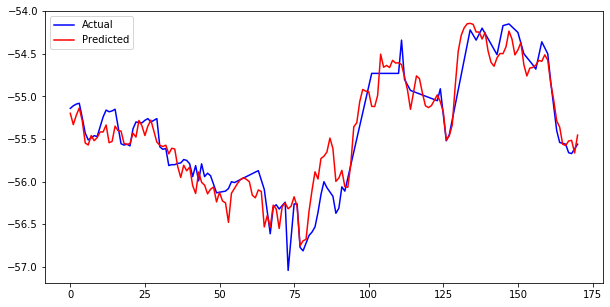

The model performance for the test set
-------------------------------------------
Mean squared error is: 0.18720826860734346
Root mean squared error is: 0.43267570836290714
R^2 score is:  -1.006377517910788


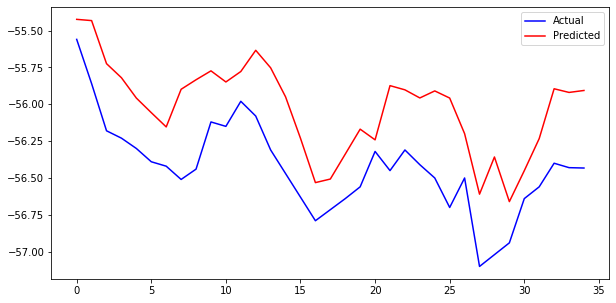

In [10]:
create_polynomial_regression_model_5(2)

## train test validation split 60%

change values here 

In [11]:
#'GWL','Rainfall','Temperature','River Discharge','Groundwater usage'

ytrain6 = data['GWL'].iloc[:206]
Xtrain6 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[:206, :]

ytest6 = data['GWL'].iloc[206:240]
Xtest6  = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[206:240, :]

yval6  = data['GWL'].iloc[240:274]
Xval6 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[240:274, :]

In [12]:
print(ytrain6.shape,Xtrain6.shape,  
      ytest6.shape,Xtest6.shape, 
      yval6.shape,Xval6.shape)

(206,) (206, 4) (34,) (34, 4) (34,) (34, 4)


## 5. Call model

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

def create_polynomial_regression_model_6(degree):
    #Creates a polynomial regression model for the given degree"    
    poly_features = PolynomialFeatures(degree=degree)
    
    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(Xtrain6)
    
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, ytrain6)
  
   #predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
  
    #predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(Xtest6))
  
    #evaluating the model on training dataset
    rmse_train = metrics.mean_squared_error(ytrain6, y_train_predicted)
    r2_train = metrics.r2_score(ytrain6, y_train_predicted)
  
    #evaluating the model on test dataset
    rmse_test = metrics.mean_squared_error(ytest6, y_test_predict)
    r2_test = metrics.r2_score(ytest6, y_test_predict)
  
    import math
    mse = metrics.mean_squared_error(ytest6, y_test_predict)
    rmse = math.sqrt(mse)
    rmse


        
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("Mean squared error is:",metrics.mean_squared_error(ytrain6,y_train_predicted))
    print("Root mean squared error is:",rmse)
    print("R^2 score is: ",metrics.r2_score(ytrain6, y_train_predicted))
    
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(range(len(ytrain6)), ytrain6, '-b',label='Actual')
    ax.plot(range(len(y_train_predicted)), y_train_predicted, 'r', label='Predicted')
    #plt.plot(x_ax, y_val[:,1], label="y2-val", color='m')
    #plt.plot(x_ax, predictions, label="y2-pred", color='r')
    plt.legend()
    plt.show()
    
    
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("Mean squared error is:",metrics.mean_squared_error(ytest6,y_test_predict))
    print("Root mean squared error is:",rmse)
    print("R^2 score is: ",metrics.r2_score(ytest6, y_test_predict))

    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(range(len(ytest6)), ytest6, '-b',label='Actual')
    ax.plot(range(len(y_test_predict)), y_test_predict, 'r', label='Predicted')
    #plt.plot(x_ax, y_val[:,1], label="y2-val", color='m')
    #plt.plot(x_ax, predictions, label="y2-pred", color='r')
    plt.legend()
    plt.show()




The model performance for the test set
-------------------------------------------
Mean squared error is: 0.04056499900173837
Root mean squared error is: 0.5492847051454751
R^2 score is:  0.9275460356737477


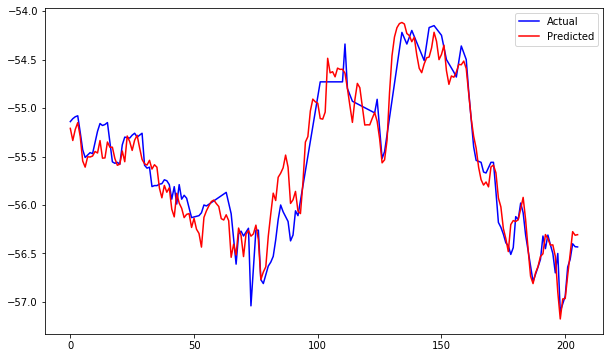

The model performance for the test set
-------------------------------------------
Mean squared error is: 0.3017136873067515
Root mean squared error is: 0.5492847051454751
R^2 score is:  0.21187538191266864


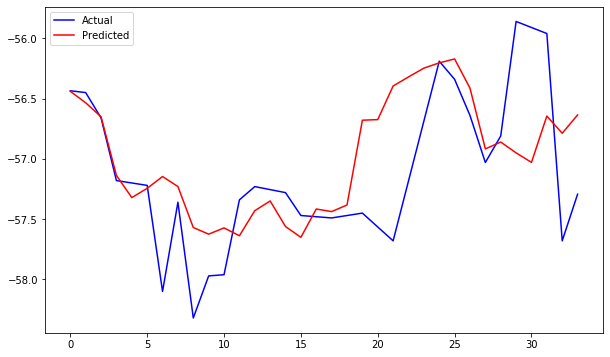

In [14]:
create_polynomial_regression_model_6(2)

## train test validation split 70%

change values here 

In [15]:
#'GWL','Rainfall','Temperature','River Discharge','Groundwater usage'

ytrain7 = data['GWL'].iloc[:240]
Xtrain7 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[:240, :]

ytest7 = data['GWL'].iloc[240:274]
Xtest7  = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[240:274, :]

yval7  = data['GWL'].iloc[274:308]
Xval7 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[274:308, :]

In [16]:
print(ytrain7.shape,Xtrain7.shape,  
      ytest7.shape,Xtest7.shape, 
      yval7.shape,Xval7.shape)

(240,) (240, 4) (34,) (34, 4) (34,) (34, 4)


## 5. Call model

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

def create_polynomial_regression_model_7(degree):
    #Creates a polynomial regression model for the given degree"    
    poly_features = PolynomialFeatures(degree=degree)
    
    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(Xtrain7)
    
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, ytrain7)
  
   #predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
  
    #predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(Xtest7))
  
    #evaluating the model on training dataset
    rmse_train = metrics.mean_squared_error(ytrain7, y_train_predicted)
    r2_train = metrics.r2_score(ytrain7, y_train_predicted)
  
    #evaluating the model on test dataset
    rmse_test = metrics.mean_squared_error(ytest7, y_test_predict)
    r2_test = metrics.r2_score(ytest7, y_test_predict)
  
    import math
    mse = metrics.mean_squared_error(ytest7, y_test_predict)
    rmse = math.sqrt(mse)
    rmse


        
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("Mean squared error is:",metrics.mean_squared_error(ytrain7,y_train_predicted))
    print("Root mean squared error is:",rmse)
    print("R^2 score is: ",metrics.r2_score(ytrain7, y_train_predicted))
    
    
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(range(len(ytrain7)), ytrain7, '-b',label='Actual')
    ax.plot(range(len(y_train_predicted)), y_train_predicted, 'r', label='Predicted')
    #plt.plot(x_ax, y_val[:,1], label="y2-val", color='m')
    #plt.plot(x_ax, predictions, label="y2-pred", color='r')
    plt.legend()
    plt.show()
    
    
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("Mean squared error is:",metrics.mean_squared_error(ytest7,y_test_predict))
    print("Root mean squared error is:",rmse)
    print("R^2 score is: ",metrics.r2_score(ytest7, y_test_predict))

    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(range(len(ytest7)), ytest7, '-b',label='Actual')
    ax.plot(range(len(y_test_predict)), y_test_predict, 'r', label='Predicted')
    #plt.plot(x_ax, y_val[:,1], label="y2-val", color='m')
    #plt.plot(x_ax, predictions, label="y2-pred", color='r')
    plt.legend()
    plt.show()



The model performance for the test set
-------------------------------------------
Mean squared error is: 0.07473860315089637
Root mean squared error is: 0.2983996675769707
R^2 score is:  0.9098936818712997


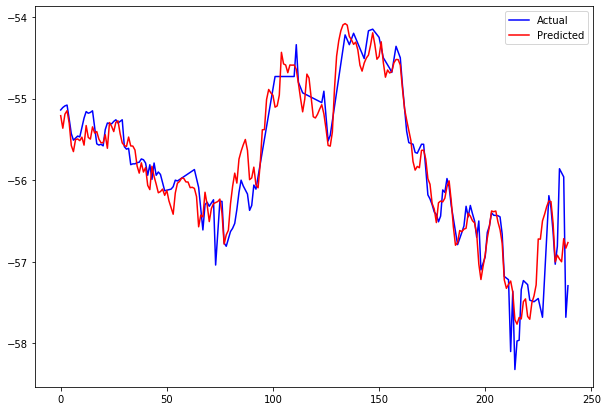

The model performance for the test set
-------------------------------------------
Mean squared error is: 0.0890423616100466
Root mean squared error is: 0.2983996675769707
R^2 score is:  0.5449458348594342


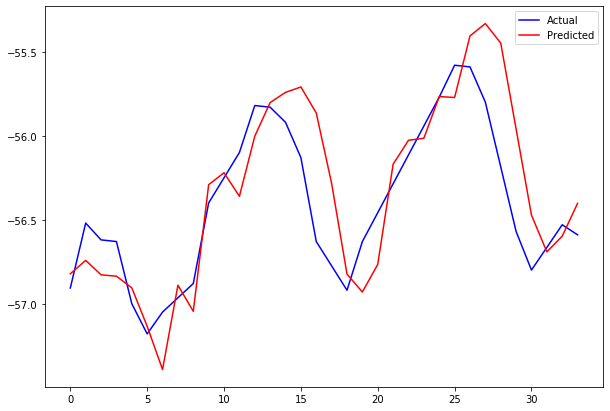

In [18]:
create_polynomial_regression_model_7(2)

## 4. Split data: Train, test, val split 80%, 10%,10% 

change values here 

In [19]:
#'GWL','Rainfall','Temperature','River Discharge','Groundwater usage'

ytrain8= data['GWL'].iloc[:275]
Xtrain8 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[:275, :]

ytest8 = data['GWL'].iloc[275:309]
Xtest8 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[275:309, :]

yval8= data['GWL'].iloc[309:343]
Xval8 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[309:343, :]

In [20]:
print(ytrain8.shape,Xtrain8.shape,  
      ytest8.shape,Xtest8.shape, 
      yval8.shape,Xval8.shape)

(275,) (275, 4) (34,) (34, 4) (33,) (33, 4)


## 5. Call model

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

def create_polynomial_regression_model_8(degree):
    #Creates a polynomial regression model for the given degree"    
    poly_features = PolynomialFeatures(degree=degree)
    
    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(Xtrain8)
    
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, ytrain8)
  
   #predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
  
    #predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(Xtest8))
  
    #evaluating the model on training dataset
    rmse_train = metrics.mean_squared_error(ytrain8, y_train_predicted)
    r2_train = metrics.r2_score(ytrain8, y_train_predicted)
  
    #evaluating the model on test dataset
    rmse_test = metrics.mean_squared_error(ytest8, y_test_predict)
    r2_test = metrics.r2_score(ytest8, y_test_predict)
  
    import math
    mse = metrics.mean_squared_error(ytest8, y_test_predict)
    rmse = math.sqrt(mse)
    rmse


        
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("Mean squared error is:",metrics.mean_squared_error(ytrain8,y_train_predicted))
    print("Root mean squared error is:",rmse)
    print("R^2 score is: ",metrics.r2_score(ytrain8, y_train_predicted))
    
    
    fig, ax = plt.subplots(figsize=(10,8))
    ax.plot(range(len(ytrain8)), ytrain8, '-b',label='Actual')
    ax.plot(range(len(y_train_predicted)), y_train_predicted, 'r', label='Predicted')
    #plt.plot(x_ax, y_val[:,1], label="y2-val", color='m')
    #plt.plot(x_ax, predictions, label="y2-pred", color='r')
    plt.legend()
    plt.show()
    
    
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("Mean squared error is:",metrics.mean_squared_error(ytest8,y_test_predict))
    print("Root mean squared error is:",rmse)
    print("R^2 score is: ",metrics.r2_score(ytest8, y_test_predict))

    fig, ax = plt.subplots(figsize=(10,8))
    ax.plot(range(len(ytest8)), ytest8, '-b',label='Actual')
    ax.plot(range(len(y_test_predict)), y_test_predict, 'r', label='Predicted')
    #plt.plot(x_ax, y_val[:,1], label="y2-val", color='m')
    #plt.plot(x_ax, predictions, label="y2-pred", color='r')
    plt.legend()
    plt.show()



The model performance for the test set
-------------------------------------------
Mean squared error is: 0.07465238071978439
Root mean squared error is: 0.22087810755625711
R^2 score is:  0.9057655656029305


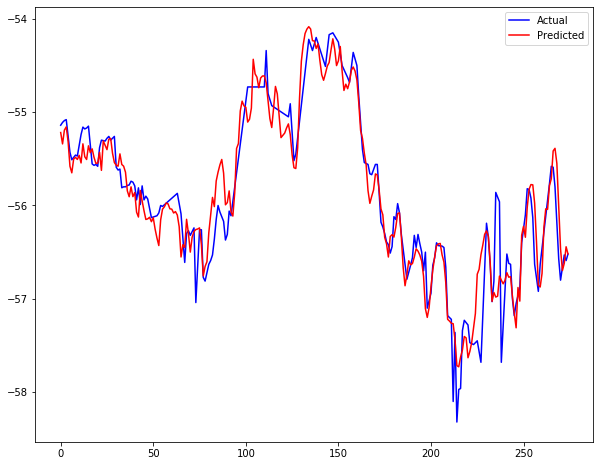

The model performance for the test set
-------------------------------------------
Mean squared error is: 0.04878713839763348
Root mean squared error is: 0.22087810755625711
R^2 score is:  0.5108864632104151


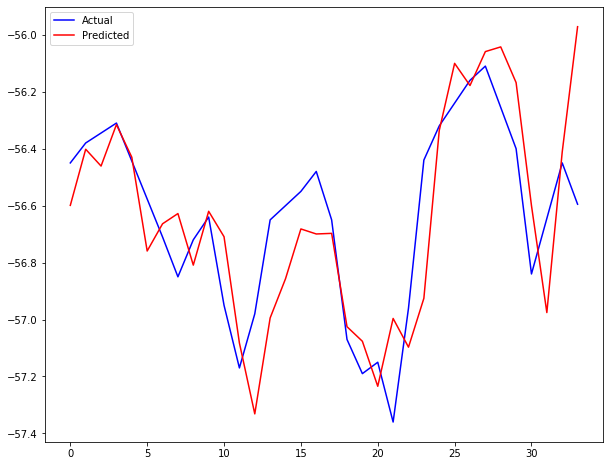

In [22]:
create_polynomial_regression_model_8(2)

from sklearn.pipeline import make_pipeline

plt.scatter(Xval5, yval5)

for degree in [6,7]:

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    model.fit(Xtrain5,ytrain5)

    y_plot = model.predict(Xval5)

    plt.plot(Xval5, y_plot, label="degree %d" % degree

             +'; $R^2$: %.2f' % model.score(Xval5, yval5))

plt.legend(loc='upper right')

plt.xlabel("Test  Data")

plt.ylabel("Predicted ")

plt.title("Variance Explained with Varying Polynomial")

plt.gcf().set_size_inches(15,10)

plt.show()